Step # 1

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd  /content/drive/MyDrive/ASSIGNMENT #1

/content/drive/MyDrive/ASSIGNMENT #1


Step #2

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
Car_Prediction=pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
Car_Prediction

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
Car_Prediction.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
Car_Prediction.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Step # 3

In [ ]:
# TO COVERT NON NUMERICAL VALUES TO NUMERICAL VALUES.
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
Car_Prediction['CarName']=labelencoder.fit_transform(Car_Prediction['CarName'])
Car_Prediction['fueltype']=labelencoder.fit_transform(Car_Prediction['fueltype'])
Car_Prediction['aspiration']=labelencoder.fit_transform(Car_Prediction['aspiration'])
Car_Prediction['doornumber']=labelencoder.fit_transform(Car_Prediction['doornumber'])
Car_Prediction['carbody']=labelencoder.fit_transform(Car_Prediction['carbody'])
Car_Prediction['drivewheel']=labelencoder.fit_transform(Car_Prediction['drivewheel'])
Car_Prediction['enginelocation']=labelencoder.fit_transform(Car_Prediction['enginelocation'])
Car_Prediction['enginetype']=labelencoder.fit_transform(Car_Prediction['enginetype'])
Car_Prediction['cylindernumber	']=labelencoder.fit_transform(Car_Prediction['cylindernumber'])
Car_Prediction['fuelsystem']=labelencoder.fit_transform(Car_Prediction['fuelsystem'])

In [ ]:
Car_Prediction

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernumber\t
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,3
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,four,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0,2
201,202,-1,138,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,four,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0,2
202,203,-1,140,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,six,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0,3
203,204,-1,142,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,six,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0,3


In [ ]:
Car_Prediction.shape

(205, 27)

In [ ]:
Car_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Step # 4

In [ ]:
# Check missing Value
Car_Prediction.isnull().any()


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
cylindernumber\t    False
dtype: bool

In [ ]:
#Total # of missing Value
Car_Prediction.isnull().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


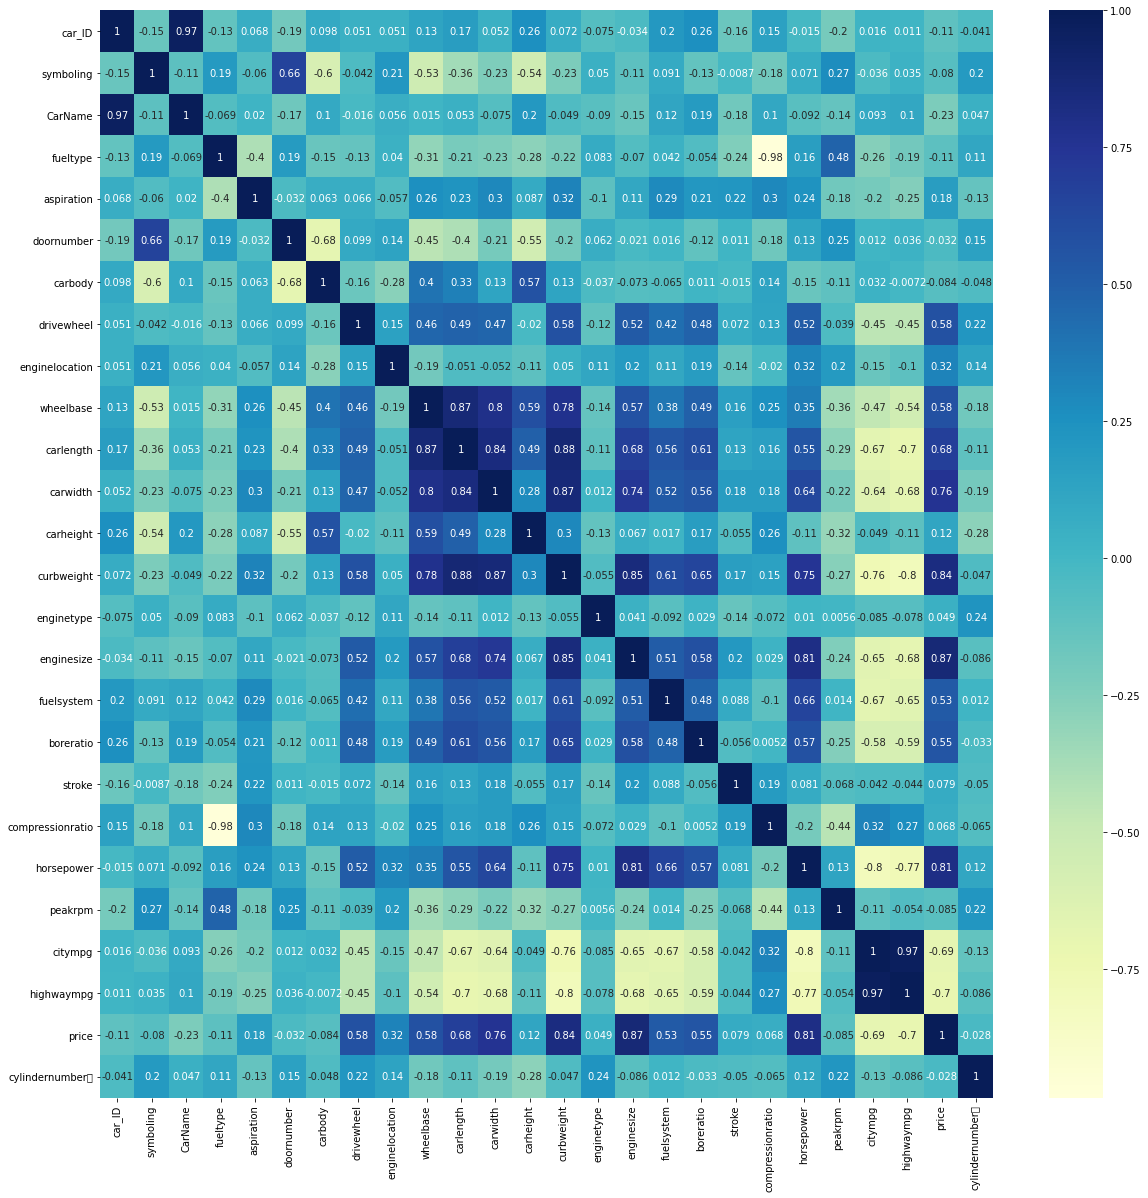

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Car_Prediction.corr() , annot=True , cmap="YlGnBu")
plt.show()

In [ ]:
Car_Prediction

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylindernumber\t
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,3
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,four,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0,2
201,202,-1,138,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,four,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0,2
202,203,-1,140,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,six,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0,3
203,204,-1,142,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,six,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0,3


In [ ]:
Final_product=Car_Prediction.drop(columns=['car_ID' ,'symboling', 'fueltype' , 'doornumber' , 'carbody' , 'citympg','highwaympg', 'CarName' , 'cylindernumber', 'peakrpm'])

In [ ]:
Final_product.columns

Index(['aspiration', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'price', 'cylindernumber\t'],
      dtype='object')

In [ ]:
Final_product

,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,price,cylindernumber\t
0,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,5,3.47,2.68,9.0,111,13495.0,2
1,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,5,3.47,2.68,9.0,111,16500.0,2
2,0,2,0,94.5,171.2,65.5,52.4,2823,5,152,5,2.68,3.47,9.0,154,16500.0,3
3,0,1,0,99.8,176.6,66.2,54.3,2337,3,109,5,3.19,3.40,10.0,102,13950.0,2
4,0,0,0,99.4,176.6,66.4,54.3,2824,3,136,5,3.19,3.40,8.0,115,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,2,0,109.1,188.8,68.9,55.5,2952,3,141,5,3.78,3.15,9.5,114,16845.0,2
201,1,2,0,109.1,188.8,68.8,55.5,3049,3,141,5,3.78,3.15,8.7,160,19045.0,2
202,0,2,0,109.1,188.8,68.9,55.5,3012,5,173,5,3.58,2.87,8.8,134,21485.0,3
203,1,2,0,109.1,188.8,68.9,55.5,3217,3,145,3,3.01,3.40,23.0,106,22470.0,3


In [ ]:
Final_product.head()

,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,price,cylindernumber\t
0,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,5,3.47,2.68,9.0,111,13495.0,2
1,0,2,0,88.6,168.8,64.1,48.8,2548,0,130,5,3.47,2.68,9.0,111,16500.0,2
2,0,2,0,94.5,171.2,65.5,52.4,2823,5,152,5,2.68,3.47,9.0,154,16500.0,3
3,0,1,0,99.8,176.6,66.2,54.3,2337,3,109,5,3.19,3.40,10.0,102,13950.0,2
4,0,0,0,99.4,176.6,66.4,54.3,2824,3,136,5,3.19,3.40,8.0,115,17450.0,1


In [ ]:
Final_product.tail()

,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,price,cylindernumber\t
200,0,2,0,109.1,188.8,68.9,55.5,2952,3,141,5,3.78,3.15,9.5,114,16845.0,2
201,1,2,0,109.1,188.8,68.8,55.5,3049,3,141,5,3.78,3.15,8.7,160,19045.0,2
202,0,2,0,109.1,188.8,68.9,55.5,3012,5,173,5,3.58,2.87,8.8,134,21485.0,3
203,1,2,0,109.1,188.8,68.9,55.5,3217,3,145,3,3.01,3.40,23.0,106,22470.0,3
204,1,2,0,109.1,188.8,68.9,55.5,3062,3,141,5,3.78,3.15,9.5,114,22625.0,2


In [ ]:
Final_product.shape

(205, 17)

In [ ]:
Final_product.size

3485

Step # 5 
**Split**

In [ ]:
final_car_predicton=np.array(Final_product)

In [ ]:
final_car_predicton.astype(np.int32)

array([[    0,     2,     0, ...,   111, 13495,     2],
       [    0,     2,     0, ...,   111, 16500,     2],
       [    0,     2,     0, ...,   154, 16500,     3],
       ...,
       [    0,     2,     0, ...,   134, 21485,     3],
       [    1,     2,     0, ...,   106, 22470,     3],
       [    1,     2,     0, ...,   114, 22625,     2]], dtype=int32)

In [ ]:
X=(Final_product.loc[: , Final_product.columns!='price'])
Y=(Final_product.loc[: , Final_product.columns=='price'])

In [ ]:
X1=np.array(X)

In [ ]:
X1

array([[  0. ,   2. ,   0. , ...,   9. , 111. ,   2. ],
       [  0. ,   2. ,   0. , ...,   9. , 111. ,   2. ],
       [  0. ,   2. ,   0. , ...,   9. , 154. ,   3. ],
       ...,
       [  0. ,   2. ,   0. , ...,   8.8, 134. ,   3. ],
       [  1. ,   2. ,   0. , ...,  23. , 106. ,   3. ],
       [  1. ,   2. ,   0. , ...,   9.5, 114. ,   2. ]])

In [ ]:
Y1=np.array(Y)

In [ ]:
Y1

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
train_data , test_data, train_labals  , test_labals=train_test_split(X1 , Y1 ,  test_size=0.3   ,  random_state=42)

In [ ]:
train_data

array([[  0. ,   1. ,   0. , ...,   8.7,  92. ,   2. ],
       [  1. ,   2. ,   0. , ...,   8. , 175. ,   2. ],
       [  1. ,   1. ,   0. , ...,  22.5,  73. ,   2. ],
       ...,
       [  0. ,   1. ,   0. , ...,   9.4,  69. ,   2. ],
       [  0. ,   2. ,   0. , ...,   9.3, 161. ,   3. ],
       [  0. ,   1. ,   0. , ...,   9. , 152. ,   3. ]])

In [ ]:
len(train_data)

143

In [ ]:
len(train_labals)

143

In [ ]:
len(test_data)

62

In [ ]:
len(test_labals)

62

**Create Model**

In [ ]:
from  keras import models
from keras import  layers

In [ ]:
Network=models.Sequential()
Network.add(layers.Dense(512 , activation='relu'  , input_shape=(4*4,)))
Network.add(layers.Dense(10 , activation='softmax'))

In [ ]:
Network.compile(optimizer='rmsprop'  ,  loss='mse'  , metrics=['mae'])

In [ ]:
Network.fit(train_data , train_labals ,  epochs=100 , batch_size=128)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 238354464.0000 - mae: 13360.4987
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 238828144.0000 - mae: 13365.4098
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 239937237.3333 - mae: 13417.4167
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 241723141.3333 - mae: 13447.6859
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 239541397.3333 - mae: 13362.8822
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 242046757.3333 - mae: 13451.2096
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 242945866.6667 - mae: 13488.9850
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 238093898.6667 - mae: 13328.7005
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 240451029.3333 - mae: 13387.6211
Epoch 10/100
2/2 [==============================] - 0s 5ms/step 

In [ ]:
test_loss , test_acc=Network.evaluate(test_data , test_labals)

2/2 [==============================] - 0s 9ms/step - loss: 237573680.0000 - mae: 12972.6367


In [ ]:
test_loss

237573680.0

In [ ]:
test_acc

12972.63671875

In [ ]:
Network_predict=Network.predict(test_data)

In [ ]:
Network_predict

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 